In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [2]:
import easyocr # pip install git+https://github.com/JaidedAI/EasyOCR.git | pip install easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

In [3]:
reader = easyocr.Reader(["ko", "en"])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |████----------------------------------------------| 8.8% Complete

Progress: |██████████████████████----------------------------| 44.8% Complete

Progress: |█████████████████████████████████████-------------| 74.9% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [4]:
result = reader.readtext("./image/dobby.jpg")

In [13]:
img = cv2.imread("./image/dobby.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
img = Image.fromarray(img)
font = ImageFont.truetype("fonts/HMKMRHD.TTF", 20)
draw = ImageDraw.Draw(img)

In [15]:
result

[([[98, 403], [508, 403], [508, 483], [98, 483]],
  'Dobby is ffiree!',
  0.49031699689570846),
 ([[78, 474], [534, 474], [534, 548], [78, 548]],
  '도비는 자율예요',
  0.8375594777233835)]

In [16]:
COLORS = np.random.randint(0, 255, size = (255, 3), dtype = "uint8")

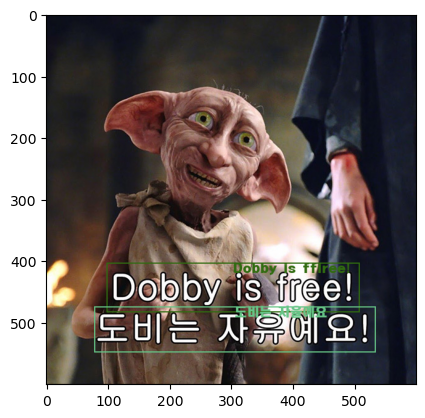

In [17]:
for i in result:
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
    color_idx = random.randint(0, 255)
    color = [int(c) for c in COLORS[color_idx]]
    
    draw.rectangle(((x, y), (x + w, y + h)), outline = tuple(color), width = 2)
    draw.text((int((x + x + w) / 2), y - 2), str(i[1]), font = font, fill = tuple(color),)
    
plt.imshow(img)
plt.show()